In [156]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from localenv import fda_api_key

%matplotlib inline

In [157]:
def format_url(base_url,search_fields,count_fields):
    return f"{base_url}api_key={fda_api_key}&search={search_fields}&count={count_fields}"

In [158]:
base_url = 'https://api.fda.gov/drug/event.json?'

#Search for Number of deaths by gender in prescription drugs
search_fields ='receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+'\
               'patient.drug.openfda.product_type.exact:\"HUMAN+PRESCRIPTION+DRUG\"+AND+seriousnessdeath:1'
    
print(search_fields)
count_fields = 'patient.patientsex'
target_url = format_url(base_url,search_fields,count_fields)

print(target_url)

receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+patient.drug.openfda.product_type.exact:"HUMAN+PRESCRIPTION+DRUG"+AND+seriousnessdeath:1
https://api.fda.gov/drug/event.json?api_key=0lYxljicOBvelBsVCqCEdMAUzWDKB1eBVSESZjrx&search=receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+patient.drug.openfda.product_type.exact:"HUMAN+PRESCRIPTION+DRUG"+AND+seriousnessdeath:1&count=patient.patientsex


In [159]:
response= requests.get(target_url).json()
print(json.dumps(response, sort_keys=True, indent=4, separators=(',', ': ')))

{
    "meta": {
        "disclaimer": "Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.",
        "last_updated": "2018-03-16",
        "license": "https://open.fda.gov/license/",
        "terms": "https://open.fda.gov/terms/"
    },
    "results": [
        {
            "count": 80623,
            "term": 1
        },
        {
            "count": 77420,
            "term": 2
        },
        {
            "count": 3287,
            "term": 0
        }
    ]
}


In [160]:
# Loop through all results
gender_results = [] 
gender_dict = { 1:'Male',
                2:'Female',
                0:'Unknown'
              }
for gender_data in response['results']:
    gender_results.append({'Gender':gender_dict[gender_data.get('term')],
                            'Count':gender_data.get('count')
                          })
    
print(gender_results)


[{'Gender': 'Male', 'Count': 80623}, {'Gender': 'Female', 'Count': 77420}, {'Gender': 'Unknown', 'Count': 3287}]


In [161]:
pd_deaths_gender = pd.DataFrame.from_dict(gender_results)
pd_deaths_gender


,Count,Gender
0,80623,Male
1,77420,Female
2,3287,Unknown


In [162]:
# Calculate Type Percents
total_deaths = pd_deaths_gender['Count'].sum()
gender_percentages=round((pd_deaths_gender['Count'] / total_deaths) * 100, 2)
gender_percentages

0    49.97
1    47.99
2     2.04
Name: Count, dtype: float64

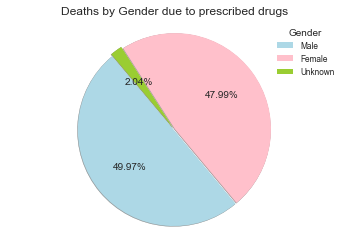

In [163]:
# Build Pie Chart
plt.pie(gender_percentages, 
        colors=["lightblue","pink","yellowgreen"], 
        explode=[0.03, 0.03, 0.1], 
        autopct='%1.2f%%', radius=4.5,
        shadow=True, startangle=130)

plt.title("Deaths by Gender due to prescribed drugs")
plt.axis("equal")

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1,  labels=pd_deaths_gender['Gender'],
                  loc="best", title="Gender", 
                  labelspacing=0.5, fancybox=True)
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]
#lgnd.legendHandles[2]._sizes = [30]


# Show Figure
plt.show()

In [164]:

count_fields = 'patient.patientagegroup'
target_url = format_url(base_url,search_fields,count_fields)

print(target_url)

https://api.fda.gov/drug/event.json?api_key=0lYxljicOBvelBsVCqCEdMAUzWDKB1eBVSESZjrx&search=receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+patient.drug.openfda.product_type.exact:"HUMAN+PRESCRIPTION+DRUG"+AND+seriousnessdeath:1&count=patient.patientagegroup


In [165]:
response= requests.get(target_url).json()
print(json.dumps(response, sort_keys=True, indent=4, separators=(',', ': ')))

{
    "meta": {
        "disclaimer": "Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.",
        "last_updated": "2018-03-16",
        "license": "https://open.fda.gov/license/",
        "terms": "https://open.fda.gov/terms/"
    },
    "results": [
        {
            "count": 15443,
            "term": 6
        },
        {
            "count": 10049,
            "term": 5
        },
        {
            "count": 157,
            "term": 3
        },
        {
            "count": 128,
            "term": 2
        },
        {
            "count": 108,
            "term": 4
        },
        {
            "count": 102,
            "term": 1
        }
    ]
}


In [166]:
# Loop through all results
group_age_results = [] 
group_age_dict = { 1:'Neonate',
                   2:'Infant',
                   3:'Child',
                   4:'Adolescent',
                   5:'Elderly',
                   6:'Adult'
                 }
for age_data in response['results']:
    group_age_results.append({'Age Group': group_age_dict[age_data.get('term')],
                              'Total Deaths' : age_data.get('count')
                             })
    
print(group_age_results)

pd_age_category = pd.DataFrame.from_dict(group_age_results)
pd_age_category

[{'Age Group': 'Adult', 'Total Deaths': 15443}, {'Age Group': 'Elderly', 'Total Deaths': 10049}, {'Age Group': 'Child', 'Total Deaths': 157}, {'Age Group': 'Infant', 'Total Deaths': 128}, {'Age Group': 'Adolescent', 'Total Deaths': 108}, {'Age Group': 'Neonate', 'Total Deaths': 102}]


,Age Group,Total Deaths
0,Adult,15443
1,Elderly,10049
2,Child,157
3,Infant,128
4,Adolescent,108
5,Neonate,102


Text(0.5,1,'Deaths related to Opioid Prescriptions by Age Group')

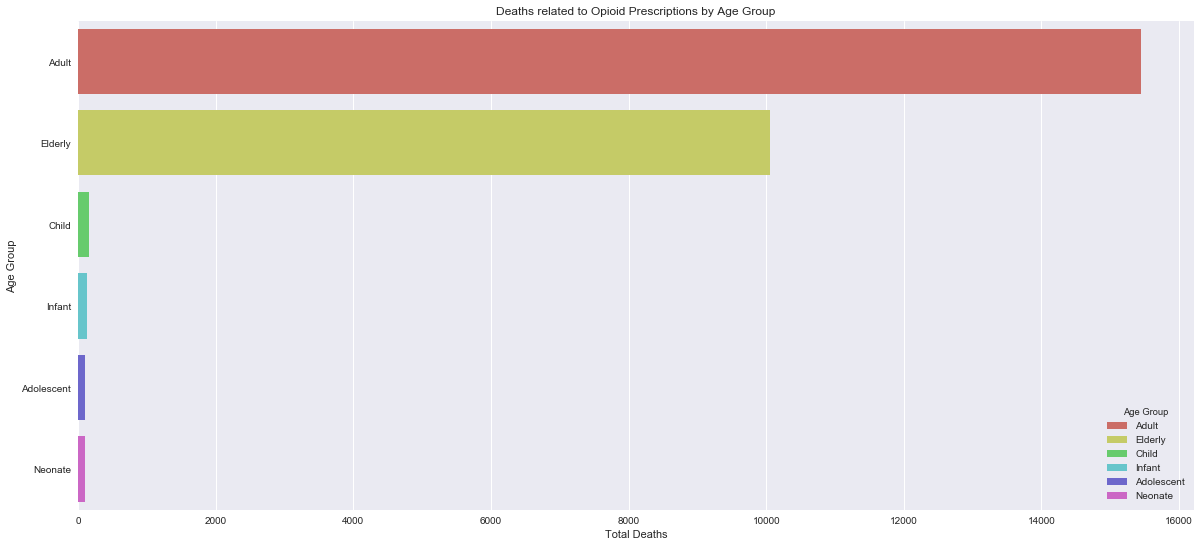

In [167]:
#x_axis = np.arange(pd_age_category['Count'].max() + 100, 250)
sns.set(color_codes=True)
#ax5 = sns.regplot(x="Latitude", y="Max Temp", data=weather_df, color="r", scatter='true')
#ax5.set_title("City Latitude vs Max Temperature (03/01/2018)")
#ax5.set_ylabel("Max Temperature (F)")
#fig = ax5.get_figure()
#fig.savefig("MaxvsLatitudeSeaborn.png")
a_dims = (20, 9)
fig, ax = plt.subplots(figsize=a_dims)
sns.barplot(ax=ax, x='Total Deaths',y='Age Group', data=pd_age_category, palette="hls", hue="Age Group", dodge=False)
ax.set_autoscale_on(True)
ax.set_title("Deaths related to Opioid Prescriptions by Age Group")

#sns.countplot(ax=ax ,y='Total Deaths', hue="Age Group", data=pd_age_category,palette="hls")
#ax.legend(labels=pd_age_category['Age Group'],loc="best", fancybox=True)
#plt.legend((urban, suburban, rural), labels, loc="best", fancybox=True)


In [168]:
search_fields ='receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+'\
               'patient.drug.openfda.product_type.exact:\"HUMAN+PRESCRIPTION+DRUG\"'

count_fields = 'patient.reaction.reactionmeddrapt.exact'
target_url = format_url(base_url,search_fields,count_fields)
print(target_url)

https://api.fda.gov/drug/event.json?api_key=0lYxljicOBvelBsVCqCEdMAUzWDKB1eBVSESZjrx&search=receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+patient.drug.openfda.product_type.exact:"HUMAN+PRESCRIPTION+DRUG"&count=patient.reaction.reactionmeddrapt.exact


In [169]:
response= requests.get(target_url).json()
print(json.dumps(response, sort_keys=True, indent=4, separators=(',', ': ')))

{
    "meta": {
        "disclaimer": "Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.",
        "last_updated": "2018-03-16",
        "license": "https://open.fda.gov/license/",
        "terms": "https://open.fda.gov/terms/"
    },
    "results": [
        {
            "count": 179952,
            "term": "DRUG INEFFECTIVE"
        },
        {
            "count": 120334,
            "term": "FATIGUE"
        },
        {
            "count": 114299,
            "term": "NAUSEA"
        },
        {
            "count": 98986,
            "term": "HEADACHE"
        },
        {
            "count": 95229,
            "term": "DEATH"
        },
        {
            "count": 94463,
            "term": "PAIN"
        },
        {
            "count": 81436,
            "t

In [196]:
adverse_reaction = []

for reaction_data in response['results']:
    adverse_reaction.append({'Reaction': str.title(reaction_data.get('term')),
                              'Total' : reaction_data.get('count')
                             })
    



pd_adverse_reaction = pd.DataFrame.from_dict(adverse_reaction)
pd_adverse_reaction

,Reaction,Total
0,Drug Ineffective,179952
1,Fatigue,120334
2,Nausea,114299
3,Headache,98986
4,Death,95229
5,Pain,94463
6,Diarrhoea,81436
7,Dyspnoea,75499
8,Malaise,73360
9,Off Label Use,73173


In [207]:
#file_df["avg_cost"] = file_df["avg_cost"].map(dollar_round2)
# file_df["avg_cost"] = file_df["avg_cost"].map("${:.2f}".format)
#pd_adverse_reaction['Reaction'] = pd_adverse_reaction['Reaction'].map(str.lower(pd_adverse_reaction['Reaction'].values()))
pd_adverse_reaction.sort_values(by="Total", ascending=False, inplace=True)
pd_adverse_reaction.head(10)


,Reaction,Total
0,Drug Ineffective,179952
1,Fatigue,120334
2,Nausea,114299
3,Headache,98986
4,Death,95229
5,Pain,94463
6,Diarrhoea,81436
7,Dyspnoea,75499
8,Malaise,73360
9,Off Label Use,73173


Text(0.5,1,'Adverse Reaction Prescription Drugs (2009-2016)')

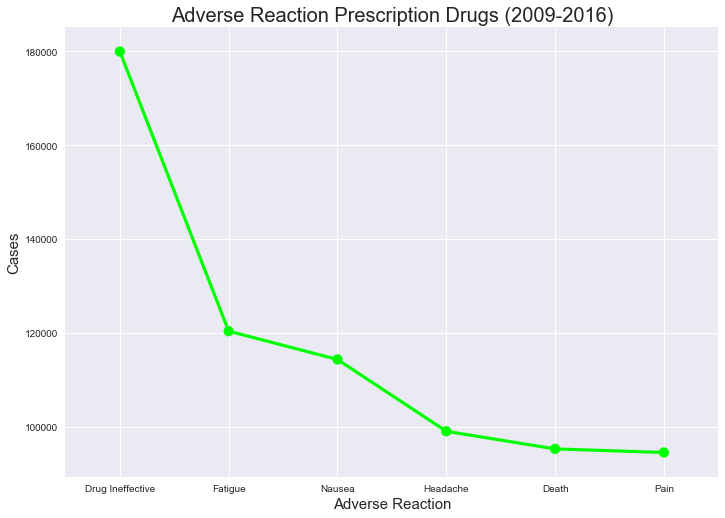

In [208]:
summary_df = pd_adverse_reaction.head(6)
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.pointplot(x="Reaction",
            y="Total",
            data=summary_df,
            color="lime")
plt.grid(linestyle="solid")
plt.xlabel("Adverse Reaction", size = 15)
plt.ylabel("Cases", size = 15)
plt.title ("Adverse Reaction Prescription Drugs (2009-2016)", size=20)